In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

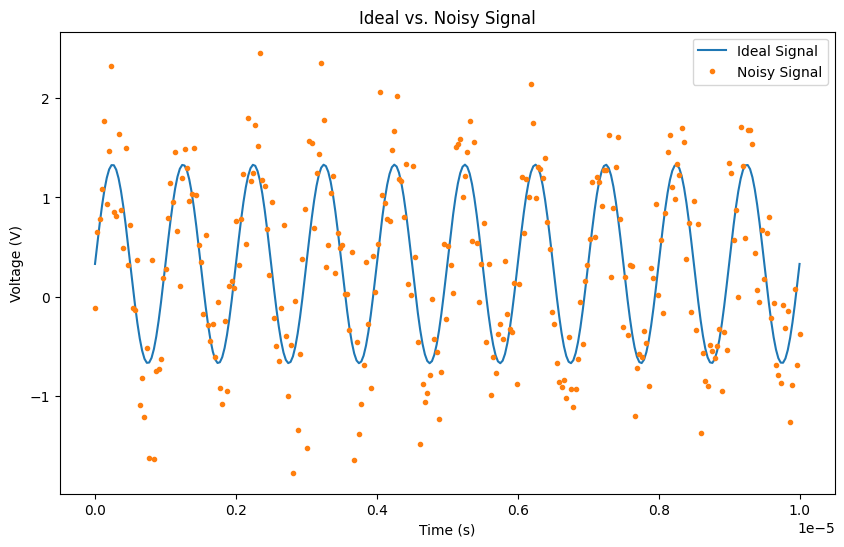

In [2]:
omega = 2 * np.pi * 1e6 
time_end = 10e-6  
num_points = 300
std_dev = 0.5  

t = np.linspace(0, time_end, num_points)

V_ideal = np.sin(omega * t) + 0.33

noise = np.random.normal(0, std_dev, num_points)
V_noisy = V_ideal + noise

plt.plot(t, V_ideal, label='Ideal Signal')
plt.plot(t, V_noisy, 'o', markersize=3, label='Noisy Signal')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Ideal vs. Noisy Signal')
plt.legend()
plt.show()


In [3]:
def model_func(t, B):
    return np.sin(omega * t) + B

popt, pcov = curve_fit(model_func, t, V_noisy)

B_fit = popt[0]

std_dev_B_fit = np.sqrt(np.diag(pcov))[0]

B_fit, std_dev_B_fit

(0.3081682405484885, 0.029354946502727304)

In [4]:
def model_func_v2(t, A, f, B):
    return A * np.sin(2 * np.pi * f * t) + B

initial_guesses = [1, 1e6, 0.33]

popt_v2, pcov_v2 = curve_fit(model_func_v2, t, V_noisy, p0=initial_guesses)

A_fit, f_fit, B_fit_v2 = popt_v2

std_dev_fit_v2 = np.sqrt(np.diag(pcov_v2))

A_fit, f_fit, B_fit_v2, std_dev_fit_v2


(1.0635125379001993,
 1000360.3161063514,
 0.30812380975068454,
 array([4.15651003e-02, 1.07106551e+03, 2.93344974e-02]))

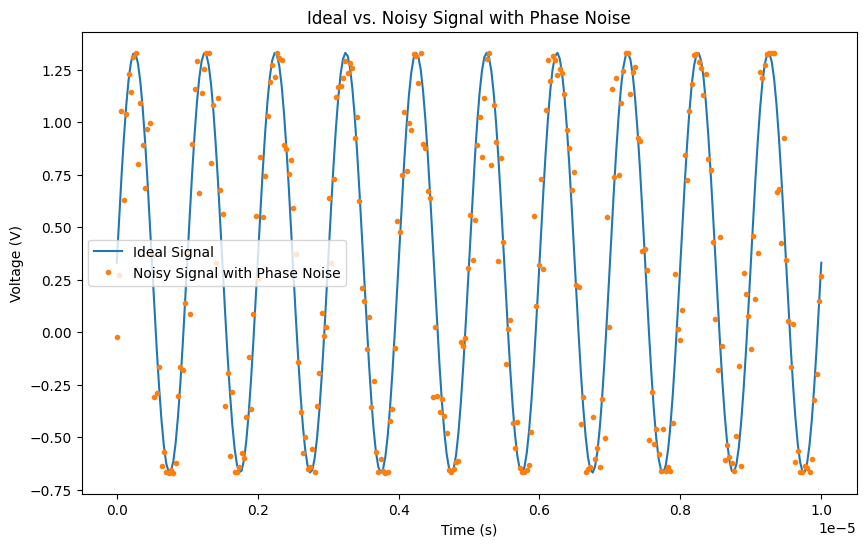

((0.9624544107328391,
  1000403.7569544151,
  0.3053073532608593,
  array([1.69407788e-02, 4.82333160e+02, 1.19556833e-02])),
 (0.10892343402649639, -2.7209037006789026e-08, -0.029083133068540434))

In [7]:
phase_noise_std = np.pi/10
phase_noise = np.random.normal(0, phase_noise_std, num_points)

V_phase_noisy = np.sin(omega * t + phase_noise) + 0.33

plt.figure(figsize=(10, 6))
plt.plot(t, V_ideal, label='Ideal Signal')
plt.plot(t, V_phase_noisy, 'o', markersize=3, label='Noisy Signal with Phase Noise')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Ideal vs. Noisy Signal with Phase Noise')
plt.legend()
plt.show()

popt_phase, pcov_phase = curve_fit(model_func_v2, t, V_phase_noisy, p0=initial_guesses)

A_fit_phase, f_fit_phase, B_fit_phase = popt_phase

std_dev_fit_phase = np.sqrt(np.diag(pcov_phase))

cov_A_f_phase = pcov_phase[0, 1]
cov_A_B_phase = pcov_phase[0, 2]
cov_f_B_phase = pcov_phase[1, 2]

(A_fit_phase, f_fit_phase, B_fit_phase, std_dev_fit_phase), (cov_A_f_phase, cov_A_B_phase, cov_f_B_phase)
